<a href="https://colab.research.google.com/github/syntrydy/MachineLearningColab/blob/master/pythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets,transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])
training_set=datasets.MNIST("MINIST_data",download=True,train=True,transform=transform)
test_set=datasets.MNIST("MINIST_data",download=True,train=False,transform=transform)

In [0]:
train_loader=torch.utils.data.DataLoader(training_set,batch_size=64, shuffle=True)
train_loader=torch.utils.data.DataLoader(test_set,batch_size=64, shuffle=True)

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [42]:
images.shape

torch.Size([64, 1, 28, 28])

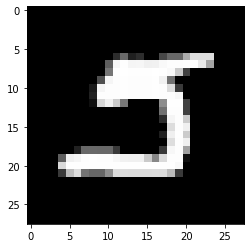

In [51]:
plt.imshow(images[np.random.randint(0,7)].numpy().squeeze(),cmap='Greys_r')
plt.show()

# Data ready for use

In [0]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [53]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x,dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [55]:
model.fc1.bias

Parameter containing:
tensor([-0.0120,  0.0284,  0.0343,  0.0107,  0.0321, -0.0194,  0.0010,  0.0294,
        -0.0128,  0.0033, -0.0281, -0.0073,  0.0223, -0.0222,  0.0326, -0.0319,
        -0.0004,  0.0111,  0.0067, -0.0337, -0.0348, -0.0281,  0.0145,  0.0006,
         0.0075, -0.0089,  0.0318,  0.0263, -0.0165, -0.0331,  0.0287, -0.0233,
         0.0209, -0.0009, -0.0154,  0.0137, -0.0196, -0.0322,  0.0103, -0.0167,
        -0.0345, -0.0163,  0.0196, -0.0253,  0.0326,  0.0115, -0.0343, -0.0232,
        -0.0042, -0.0262,  0.0055, -0.0081, -0.0328, -0.0332, -0.0168,  0.0271,
        -0.0078, -0.0188,  0.0244, -0.0307,  0.0176, -0.0108,  0.0223,  0.0205,
         0.0093,  0.0293,  0.0062, -0.0320, -0.0024,  0.0274,  0.0187, -0.0028,
         0.0279,  0.0226, -0.0231,  0.0105,  0.0262, -0.0296, -0.0024,  0.0180,
        -0.0270,  0.0114, -0.0154, -0.0017,  0.0262,  0.0155, -0.0102, -0.0229,
         0.0097, -0.0175, -0.0299, -0.0314,  0.0181,  0.0300,  0.0088, -0.0197,
         0.0211,  

In [59]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.resize_(64, 1, 784)

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        ...,

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])

In [62]:
img_idx = 0
ps = model.forward(images[img_idx,:])
ps

tensor([[0.0905, 0.1146, 0.1020, 0.0748, 0.1035, 0.0938, 0.0989, 0.0960, 0.1152,
         0.1107]], grad_fn=<SoftmaxBackward>)

In [63]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [0]:
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
